# Shotglass: Coreutils code information

## releases over time



In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import shotlib
from shotlib import select1, selectall

db,_curs = shotlib.get_db()
print(select1(_curs, 'select sqlite_version()'))

3.36.0


In [6]:
releases_df = pd.read_sql_query(
    'select tag, creator_dt from releases limit 3', db)

# convert raw list of tuples to DataFrame
# > releases_df = selectall(db, 'select tag, creator_dt from releases limit 3')
# > df = pandas.DataFrame(releases, columns=['tag', 'creator_dt'])


In [19]:

releases_by_year_sql = '''
select strftime('%Y', creator_dt) as year,
count(*) as yearly_releases
from releases
where tag like 'v%'
group by 1
'''
releases_df = pd.read_sql_query(releases_by_year_sql, db)
releases_df.head()


,year,yearly_releases
0,2002,4
1,2003,13
2,2004,5
3,2005,4
4,2006,8


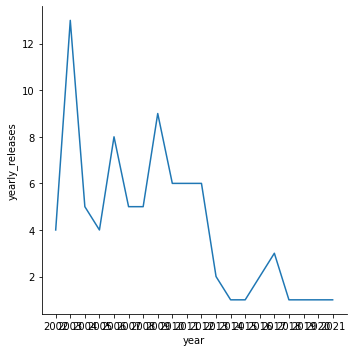

In [20]:
sns.relplot(data=releases_df, x='year', y='yearly_releases', kind='line')


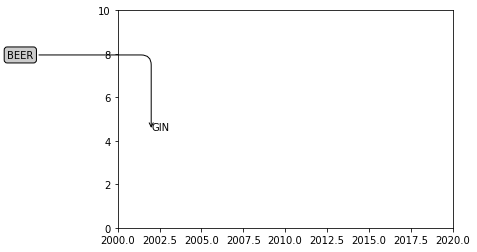

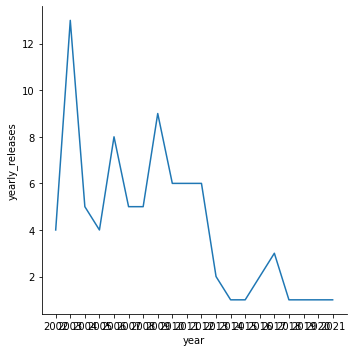

In [58]:


# styles:
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")
    
fig, ax = plt.subplots()
ax.set_xlim(2000, 2020)
ax.set_ylim(0, 10)

sns.relplot(data=releases_df, x='year', y='yearly_releases', kind='line')

if 0:
    first = 2002
    plt.text(2002-first, 4.5, "4.5") # , transform=ax.transAxes)
    # , horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.text(2003-first, 5.5, "5.0", horizontalalignment='left', size='medium', color='black', weight='semibold')
    plt.text(2006-first, 5.5, "6.0")
    plt.text(2008-first, 5.5, "7.0")
    plt.text(2009-first, 5.5, "8.0")
    plt.text(2013, 5.5, "8.21", textcoords='offset points')
    plt.text(2021-first, 5.5, "9.0")
else:
    offset = 72
    ax.annotate('BEER',
            (2002, 4.5), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
    ax.text(2002, 4.5, "GIN") # , transform=ax.transAxes)
    


In [18]:
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# releases_by_month_sql = '''
# select strftime('%Y', creator_dt) as month,
# count(*) as monthly_releases
# from releases
# group by 1
# '''
# releases_df = pd.read_sql_query(releases_by_month_sql, db)
# releases_df.head()
# sns.heatmap(releases_df)
# , mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

## demo: Data vs Figure plotting axes

* https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html

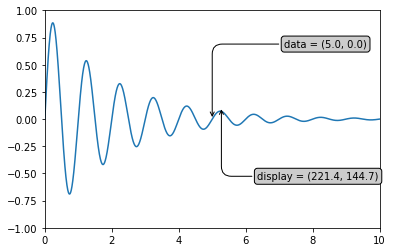

In [51]:
import numpy as np

# styles:
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")
ann_style = dict(
    textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)

# data:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

# plot:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0
# This computing the transform now, if anything
# (figure size, dpi, axes placement, data limits, scales..)
# changes re-calling transform will get a different value.
xdisplay, ydisplay = ax.transData.transform((xdata, ydata))

offset = 72
ax.annotate('data = (%.1f, %.1f)' % (xdata, ydata),
            (xdata, ydata),  # arrow aims here: data coords
            xytext=(1*offset, offset),  # text label
            **ann_style)

if True:
    ax.annotate('display = (%.1f, %.1f)' % (xdisplay, ydisplay),
                (xdisplay, ydisplay),  # figure coords
                xytext=(0.5*offset, -offset),
                xycoords='figure pixels',
                **ann_style)

plt.show()